In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [143]:
df= pd.read_csv('fcc-forum-pageviews.csv', index_col=['date'])

In [144]:
df.index=pd.to_datetime(df.index)
df.shape

(1304, 1)

In [145]:
df=df[(df['value'] > df['value'].quantile(0.025)) &
       (df['value'] < df['value'].quantile(0.975))]
df.shape

(1238, 1)

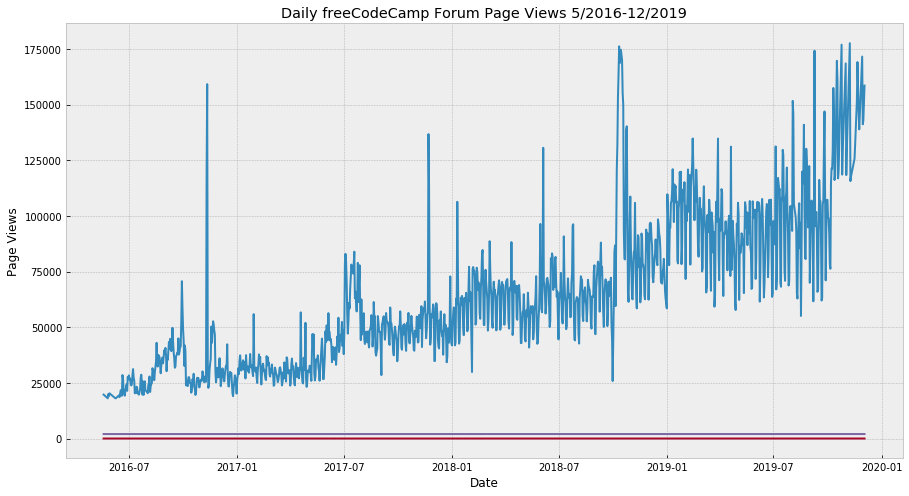

In [116]:
with plt.style.context('bmh'):
    plt.figure(figsize=(15,8))
    plt.xlabel('Date')
    plt.ylabel('Page Views')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.plot(df)

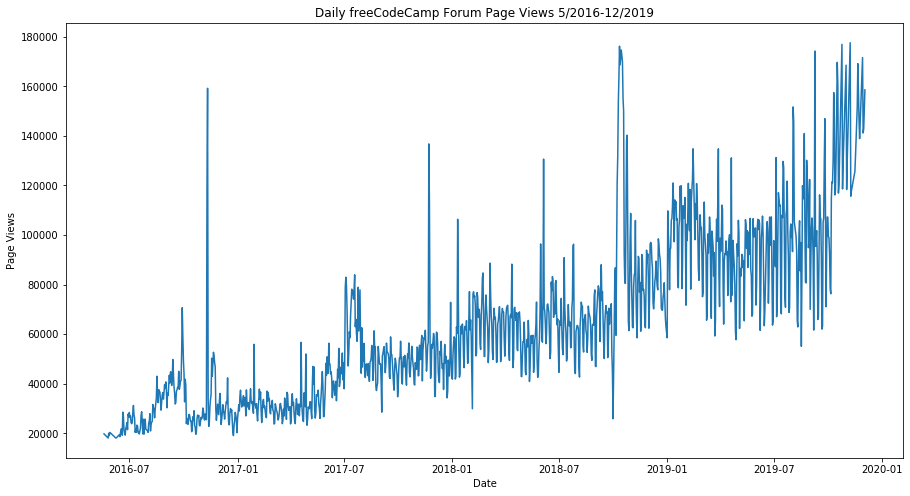

In [133]:
fig= plt.figure(figsize=(15,8))
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.plot(df)


,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016


In [151]:
import datetime
df_bar=df.copy()
df_bar['month'] = df_bar.index.month
df_bar['year'] = df_bar.index.year
df_bar.head()

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016


In [45]:
import calendar
month_names=[]

for month_idx in df_bar.month.unique():
    month_names.append(calendar.month_name[month_idx])
print(month_names)

['May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April']


<Figure size 1080x576 with 0 Axes>

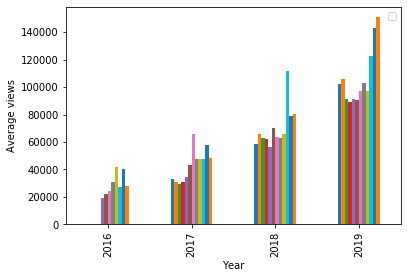

In [134]:
plt.figure(figsize=(15,8))
ax=df_bar.groupby(['year', 'month']).mean().unstack().plot(kind='bar')
plt.legend(month_names)
plt.ylabel('Average views')
plt.xlabel('Year');
ax

[Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019')]

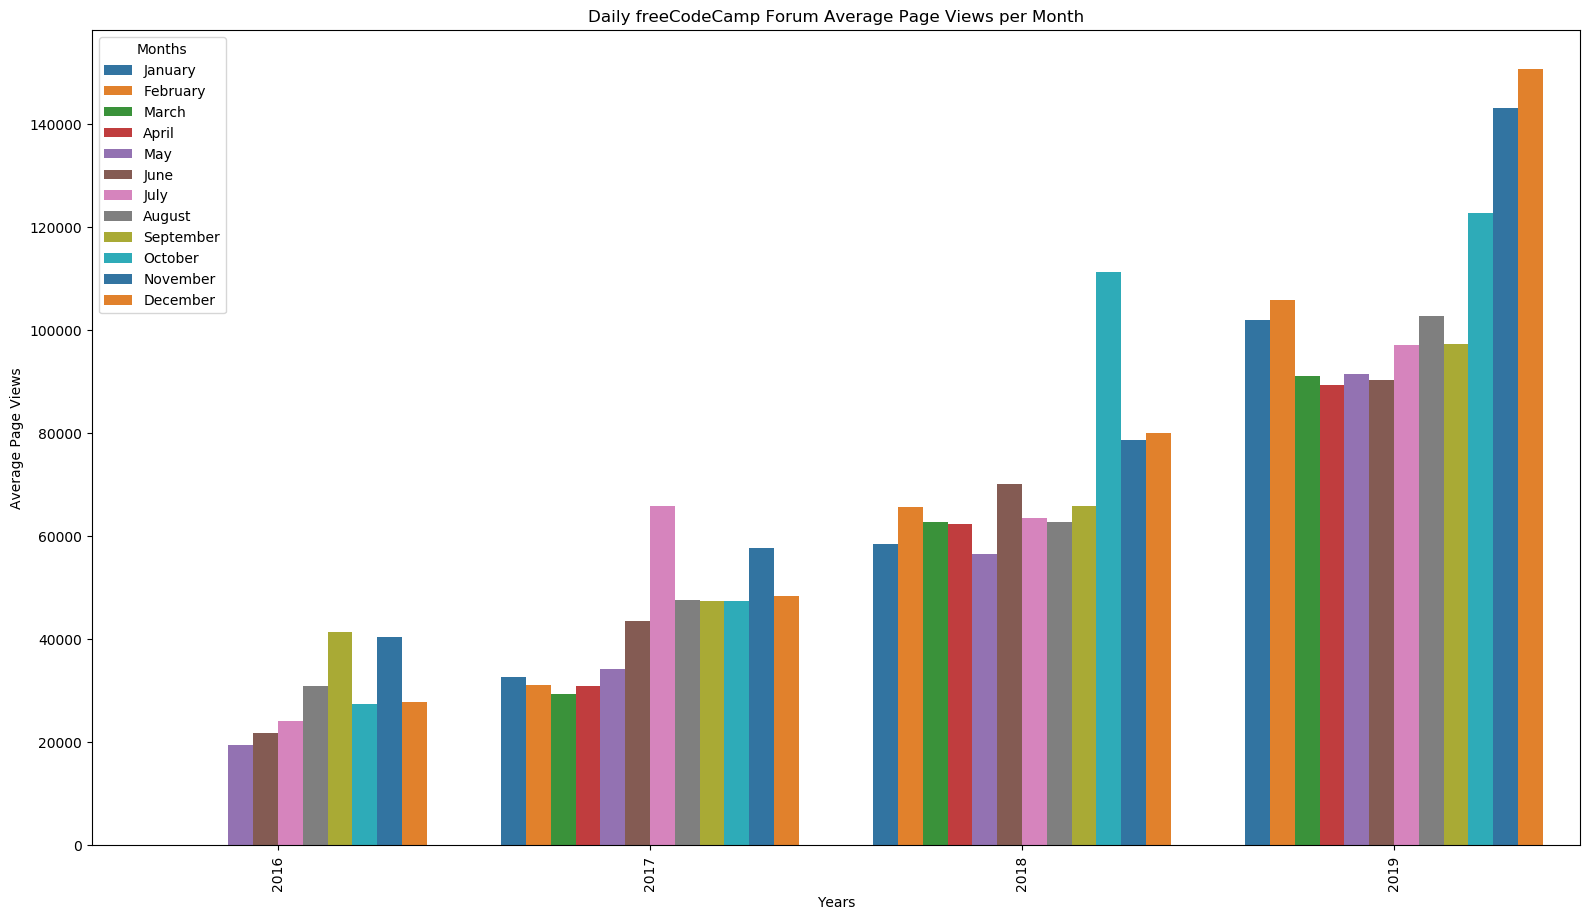

In [156]:
df_bar = df.copy()
df_bar["Years"] = df_bar.index.year
df_bar["Months"] = df_bar.index.month_name()
df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
df_bar = df_bar.rename(columns={"value": "Average Page Views"})
df_bar = df_bar.reset_index()
missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }

df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

    # Draw bar plot
fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

chart = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')

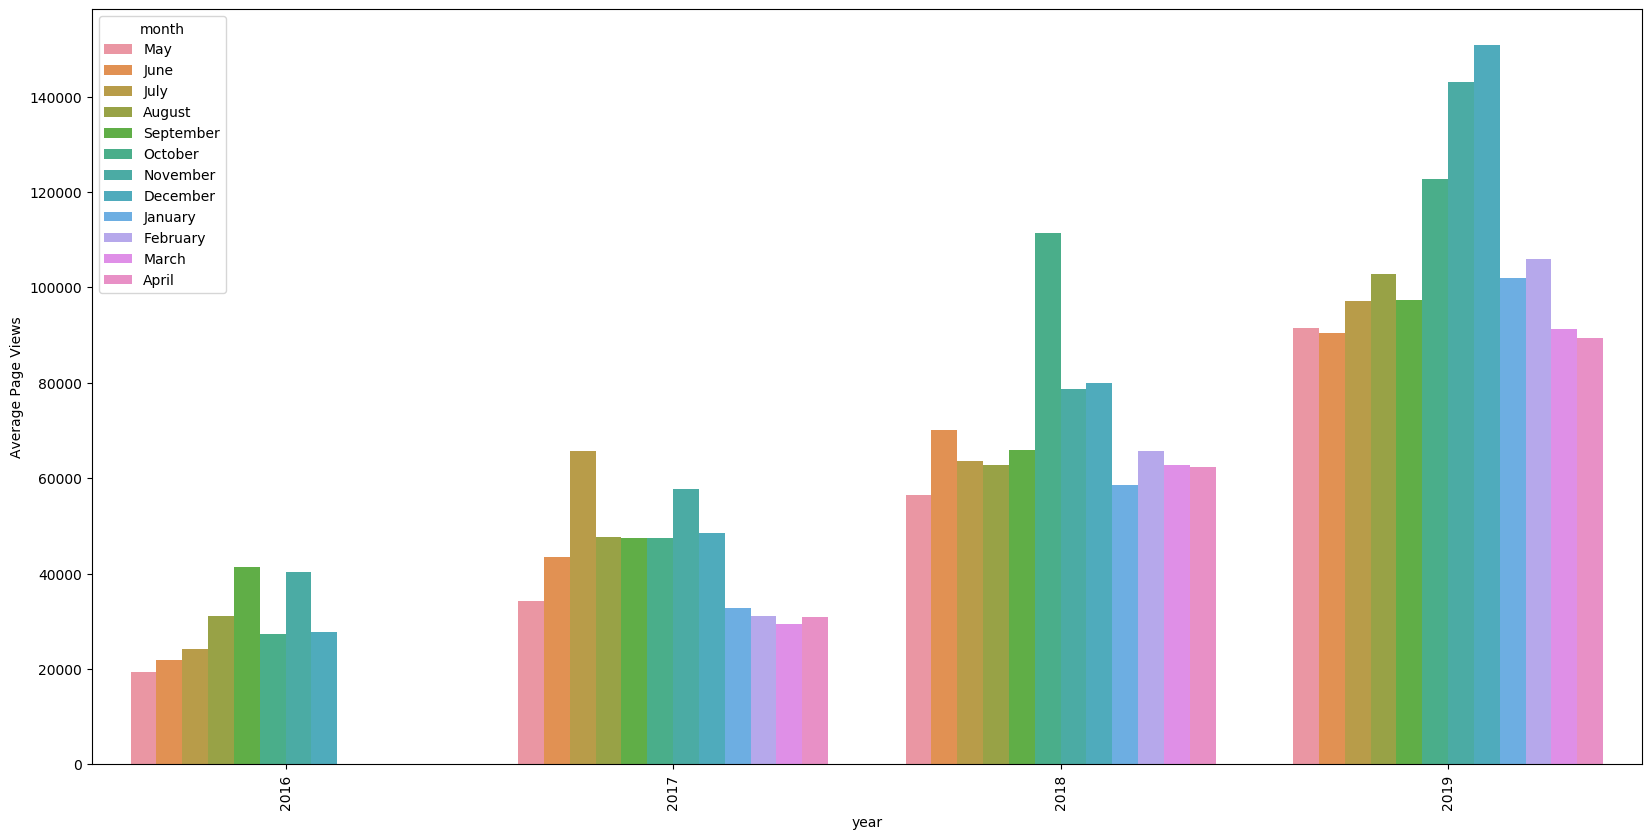

In [168]:
df_bar = df.copy()
df_bar["year"] = df_bar.index.year
df_bar["month"] = df_bar.index.month_name()
df_bar = pd.DataFrame(df_bar.groupby(["year", "month"], sort=False)["value"].mean().round().astype(int))
df_bar.head(5)
df_bar = df_bar.rename(columns={"value": "Average Page Views"})
df_bar = df_bar.reset_index()

fig, ax = plt.subplots(figsize=(20, 10), dpi=100)

chart = sns.barplot(data=df_bar, x="year", y="Average Page Views", hue="month")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center');

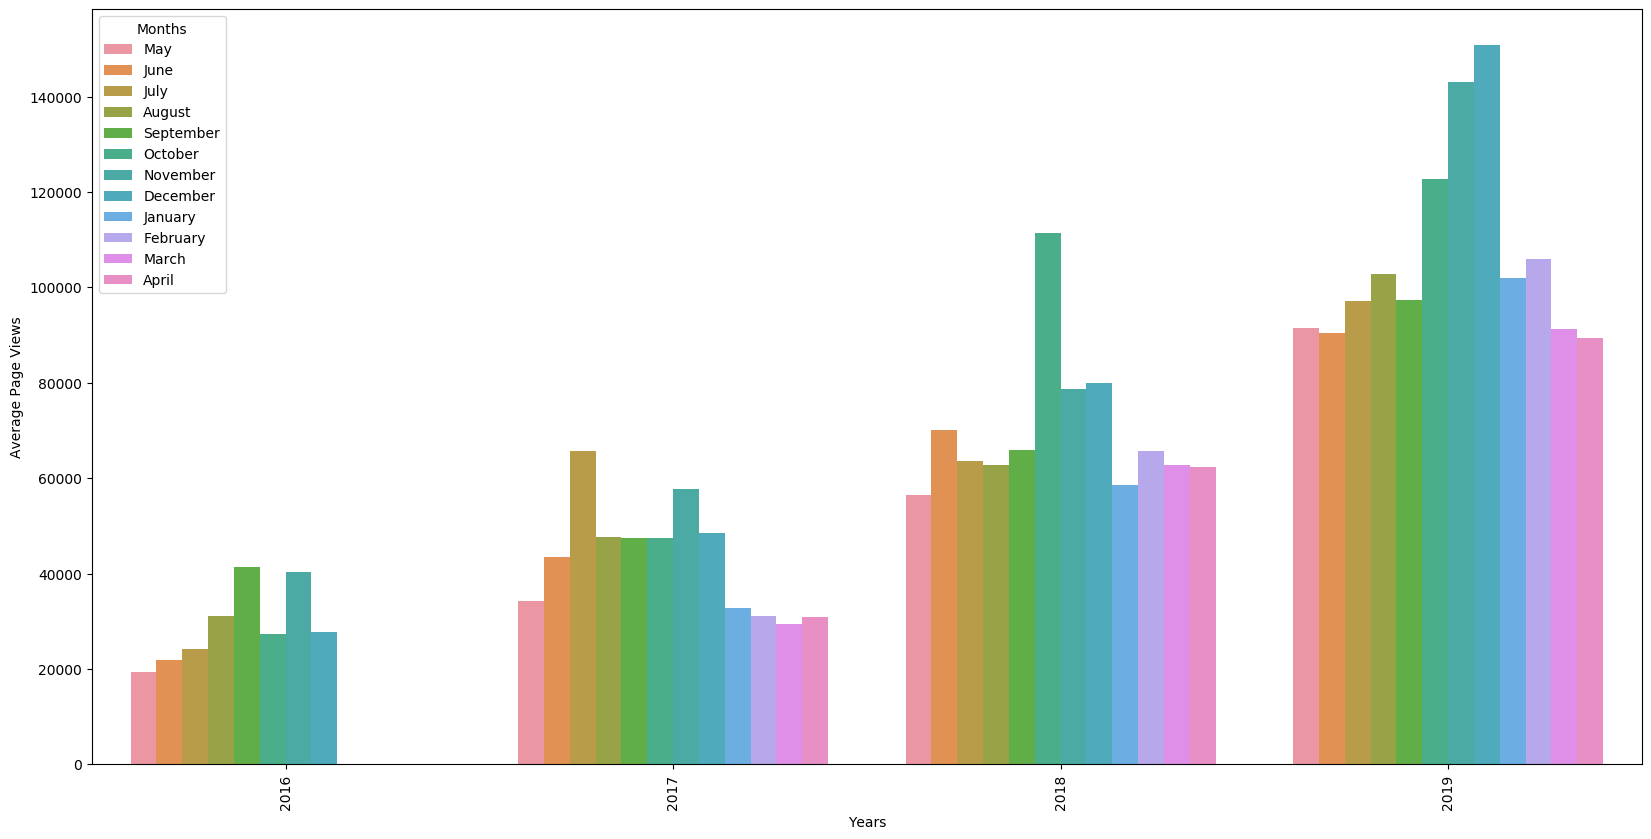

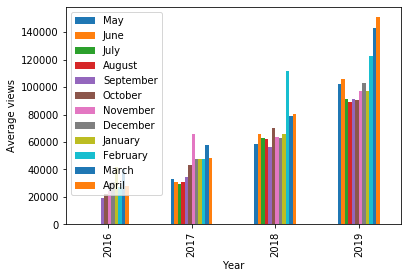

In [79]:

ax=df_bar.groupby(['year', 'month']).mean().unstack().plot(kind='bar')
plt.legend(month_names)
plt.ylabel('Average views')
plt.xlabel('Year');


In [101]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

df_box.head()

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016


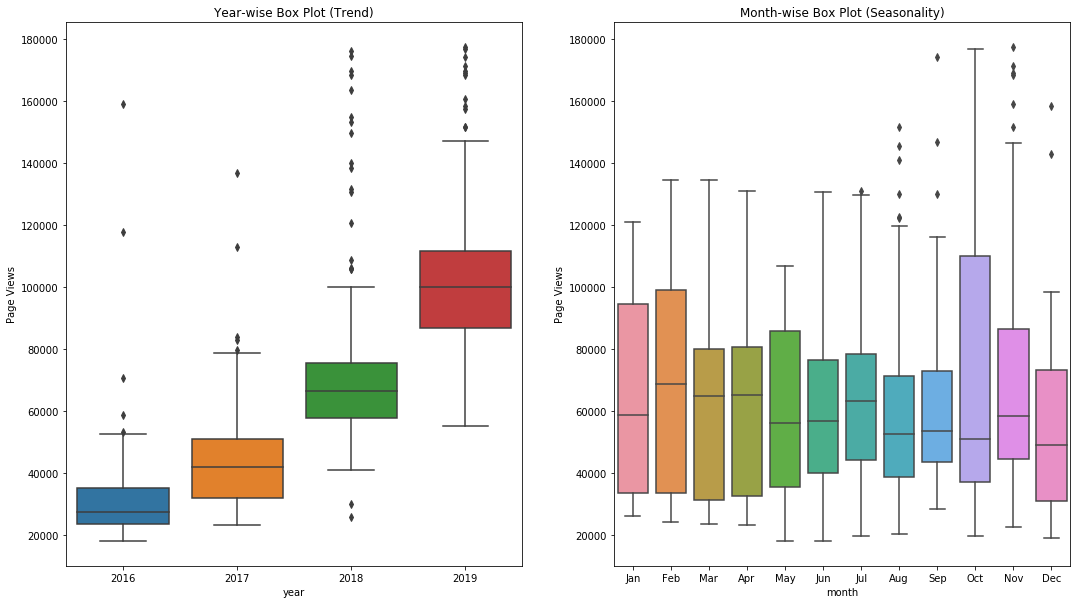

In [114]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

sns.boxplot(ax=axes[0], data=df_box, x='year', y='value').set(title=r'Year-wise Box Plot (Trend)', ylabel= 'Page Views')

sns.boxplot(ax=axes[1], data=df_box, x='month', y='value', 
            order = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']).set(title=r'Month-wise Box Plot (Seasonality)', ylabel= 'Page Views');

In [82]:
ye